## **About this Script** 

This script uses the fastai deep learning python library to build a CNN for a chest X-ray dataset. The model will classify images of covid, pneumonia, vs. normal. 

If you have any questions, please contact maese005@umn.edu

## **Step 1: Get Data** 

Mount your Google Drive to Google Colab.

This will allow you to share files and access images stored in Google Drive from Google Collab.

Once you run this code, you will receive a prompt asking you to click a link. When you click on this link, it will allow for 'Google Files Stream' to access your drive.

After, you will receive a long authentication code which you need to copy and enter into your Colab's notebook.

Once Google Drive is mounted, download the data to your Google Drive. The data can be accessed here: https://drive.google.com/drive/folders/1j-c1aGvZzRMP2Q1H11XJlWi7Z-ZYPEfe?usp=sharing
I recommend adding a shortcut to the data to your Google Drive. This is faster than downloading the data. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Step 2: Import Libraries** 

In [6]:
from PIL import Image
from pathlib import Path
!pip install fastai --upgrade
from fastai.vision.all import *
import numpy as np
from keras.preprocessing import image

Requirement already up-to-date: fastai in /usr/local/lib/python3.7/dist-packages (2.3.1)


In [7]:
!ls '/content/drive/My Drive/AI_Workshop/images/' 
#Use the list command to see what is stored at this location. Based on the output, there are two directories titled, 'test' and 'train'

test  train


## **Step 3: Prepare the data** 

Store the path to your dataset location as the Path() object.

Also store the path to your training dataset. 

In [8]:
data_path = Path("/content/drive/My Drive/AI_Workshop/images/")

In [9]:
training_path = data_path/'train'

Create a data loader object. A DataLoader object is an object that stores various objects that are used for training and validating a model.

**valid_pct=0.2** is the ratio of validation data the model would test itself on.

**bs=4** is the batch size

**item_tfms** This is an image transformation step that transforms the images to the given specifications before grabbing batches. Image transformation is an important step when you train a model for images because it helps avoid overfitting. Note: only transform the training images, never modify the validation images because the fastai Python library does this for us by default. Several ways to transform an image include:
* Resizing: this randomly resizes images. 
* Cropping
* Squishing
* Padding

In [10]:
dataloaders = ImageDataLoaders.from_folder(path=training_path,
                                           item_tfms=Resize(224),
                                           valid_pct=0.2,
                                           bs=64,
                                           seed=42)

Take a look at a batch (a small section) of the images.

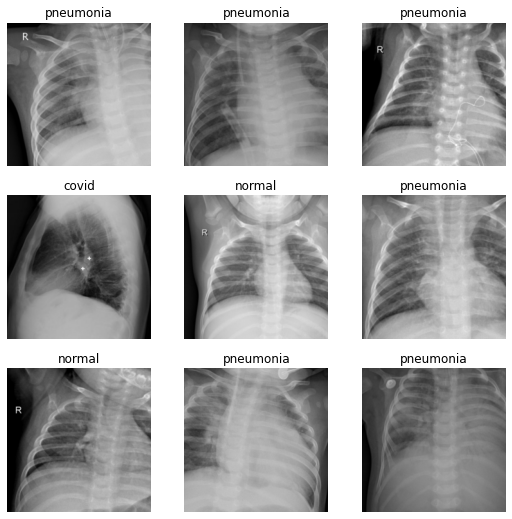

In [11]:
dataloaders.show_batch()

Let's use print statements to print some information about this data.

In [12]:
print(f"Number of classes: {dataloaders.c}, class names: {dataloaders.vocab}")
print(f"Images in train set: {len(dataloaders.train.dataset)}")
print(f"Images in validation set: {len(dataloaders.valid.dataset)}")

Number of classes: 3, class names: ['covid', 'normal', 'pneumonia']
Images in train set: 4646
Images in validation set: 1161


## **Step 4: Train your model and fine tune it** 

Train your model using a CNN. This will create a learner.

In order to train our image dataset, we will use a pre-trained CNN model. This is known as transfer learning. The benefit of using transfer learning (pre-trained models) is that this enables faster training and better accuracy. This is especially helpful to computer vision problems. 
*  resent18 is the pre-trained model we will use for training. It can be referred to as the ResNet18 architecture. 

In [13]:
learner = cnn_learner(dataloaders,
                      resnet18,
                      metrics=[error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


Fine tune/tweak your AI algorithm. 

To fine tune your model, remove the output layer of the pre-trained model and replace it with a new one. Fine-tuning may also involve adding or removing layers of your CNN.  

Our model has been pre-trained/already trained for a particular task. We need to fine tune it to make it perform a secondary task (our new task). 

Here is an example: if you want to create a model that recognizes trucks, you can pre-train it on a model that recognizes cars, then fine tune it to recognize trucks. The two neural networks carry out different tasks, but they are programmed on similar data. 

Fine-tuning helps improve the accuracy of a new neural network because it integrates data from an existing neural network and uses it as an initialization point to make the training process time and resource-efficient. 

Therefore, fine-tuning can only be used when the dataset of an existing model are similar to each other. 

In [14]:
learner.fine_tune(epochs=2)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.722922,0.318992,0.087855,0.912145,18:02


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.196434,0.128228,0.038760,0.961240,22:46
1,0.098923,0.080450,0.029285,0.970715,22:55


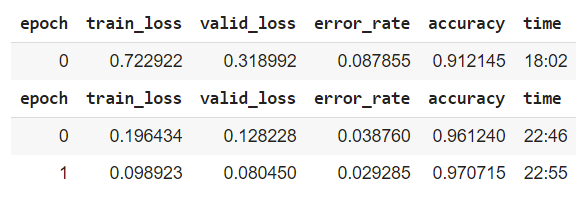

## **Step 5: Create confusion matrix** 

Read code that will create a confusion matrix. 

In [15]:
def show_confusion_matrix(learner):
    interpreter = ClassificationInterpretation.from_learner(learner)
    interpreter.plot_confusion_matrix(figsize=(7,7), dpi=60)

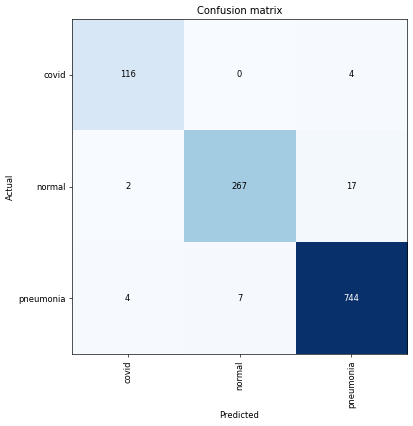

In [16]:
show_confusion_matrix(learner)

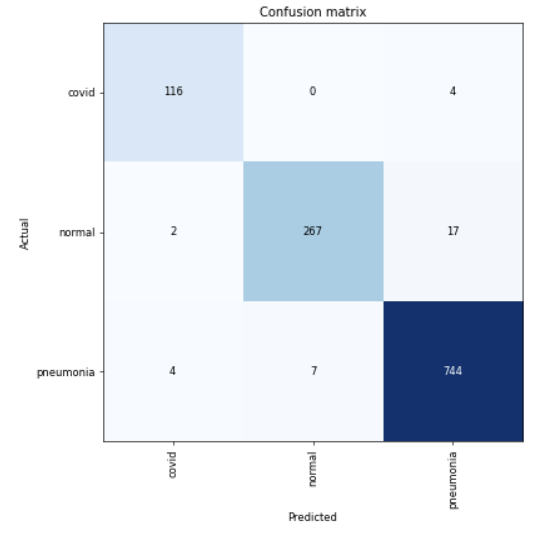

Read in an image to test in your model. 

In [19]:
img=image.load_img('/content/drive/My Drive/AI_Workshop/images/test/covid/AR-2.jpg')
print(img.shape) #(402,445)

(402, 445)


Transform the image (this is a data augmentation step).

In [20]:
img=image.img_to_array(img)
img=img.reshape((1,) + img.shape)
img=img.reshape(-1,178890)

Put the image into the model and see what it predicts!

In [21]:
learner.predict(img) #Yay! It predicted the correct label. 

('covid', tensor(0), tensor([7.1998e-01, 1.9270e-04, 2.7983e-01]))